**Assignment on Classification**

1. Read the dataset to python environment

In [7]:
import numpy as np
import pandas as pd
df=pd.read_csv("/content/iris(e).csv")
df.head(4)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa


2. Do the necessary pre-processing steps


***1. Understanding of data***

In [8]:
df.shape

(150, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [11]:
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
df.describe(include="O")

,Classification
count,150
unique,3
top,Iris-setosa
freq,50


***2.Data Cleaning***

In [14]:
df.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [16]:
Mean=df.mean()
Mean_imp=df.fillna(Mean)
Mean_imp.head()

<ipython-input-16-20ad054faece>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Mean=df.mean()


,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,Iris-setosa
1,4.900000,3.0,1.4,0.2,Iris-setosa
2,5.855944,3.2,1.3,0.2,Iris-setosa
3,4.600000,3.1,1.5,0.2,Iris-setosa
4,5.000000,3.6,1.4,0.2,Iris-setosa


In [19]:
df1=Mean_imp
df1.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [20]:
df1[df1.duplicated(keep='first')]

,SL,SW,PL,PW,Classification
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [21]:
df1.drop_duplicates(keep='first',inplace=True)

In [22]:
df1[df1.duplicated(keep='first')]

,SL,SW,PL,PW,Classification


***3. Data Visualisation***

<Axes: >

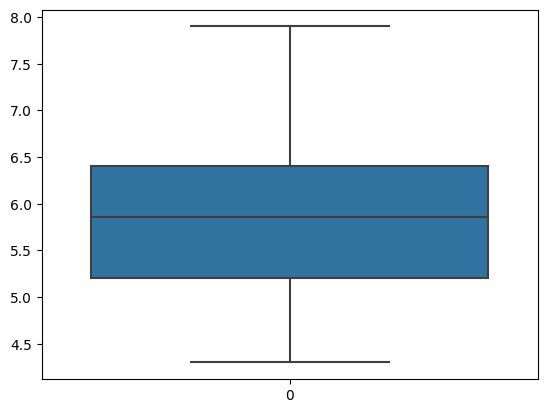

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(df1.SL)

<Axes: >

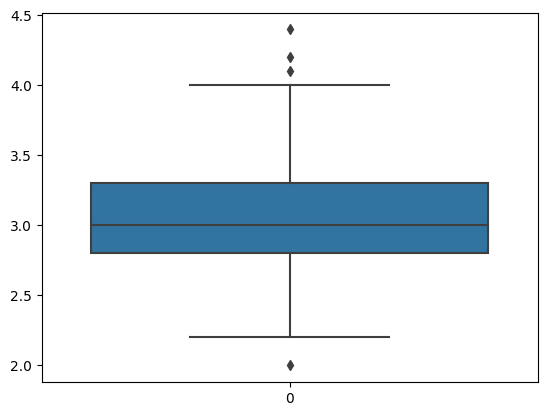

In [32]:
sns.boxplot(df1.SW)

<Axes: >

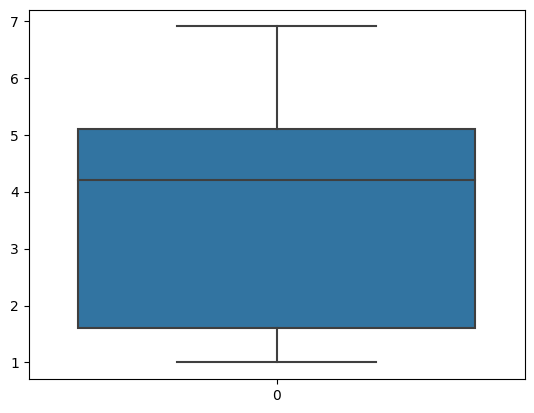

In [33]:
sns.boxplot(df1.PL)

<Axes: >

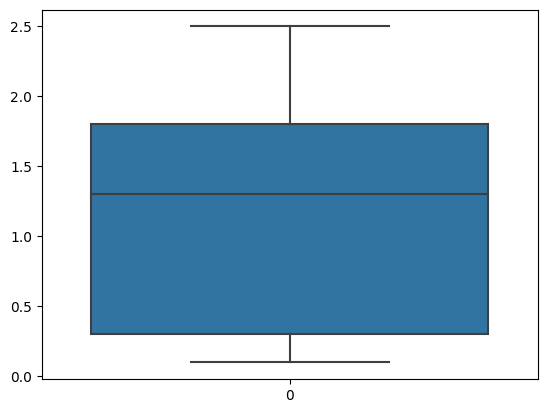

In [35]:
sns.boxplot(df1.PW)

3. Find out which classification model gives the best result (try all the
classification algorithms discussed in the session)

In [36]:
df1.groupby('Classification').size()

Classification
Iris-setosa        48
Iris-versicolor    50
Iris-virginica     49
dtype: int64

In [37]:
feature_columns=['SL','SW','PL','PW']
x=df1[feature_columns].values
y=df1['Classification'].values

In [38]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
# Fit the model

from sklearn.neighbors import KNeighborsClassifier
Classifier=KNeighborsClassifier(n_neighbors=3)
Classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [43]:
y_pred=Classifier.predict(x_test)

In [45]:
#Evaluate the model
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)*100
print('Accuracy of our model is equal',str(round(accuracy,2)),'%')


Accuracy of our model is equal 90.0 %


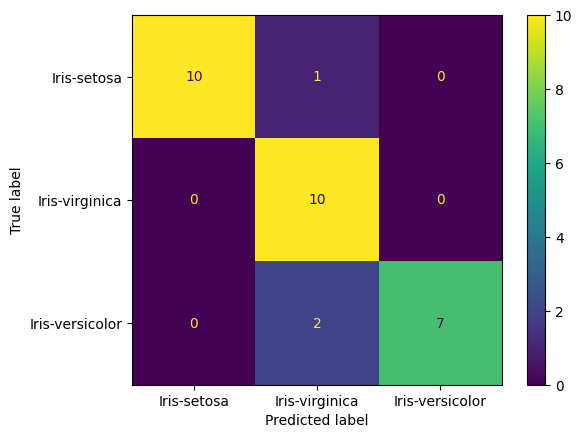

In [48]:
# ConfusionMatrix
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
labels=['Iris-setosa','Iris-virginica','Iris-versicolor']
result=confusion_matrix(y_test,y_pred)
result

score=accuracy_score(y_test,y_pred)
score

cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()